# Final Data Science Report for Capstone One

## Introduction
An explorative analysis on the country and states in the US affected by the Deferred Action for Childhood Arrivals (DACA). To study and analyze the impact of DACA and recent trends as per the last four quarters in 2017.

### 1. Data Cleaning
-------------------

##### How data is collected?
Data was collected from the USCIS link for the 2017 and 2016.
https://www.uscis.gov/tools/reports-studies/immigration-forms-data/data-set-form-i-821d-deferred-action-childhood-arrivals

All data was converted from PDF to excel data using the tool from https://www.pdftoexcel.com/

Data will be divided into four parts – Case status, Country Status, States Status and 2017 Status

Common Problems Found in Datasets
Inconsistent column names
Missing Data
Outliners
Duplicate rows
Untidy
Need to process columns
Column type signal unexpected data values
Let’s go over each problem and what I did to wrangle the data.



##### Inconsistent column names
Downloaded the pdf from the USCIS site and convert that into excel sheet using an online tool. Now the headings are inconsistent with title case, uppercase and some space. Load the data into pandas and checked how inconsistent the column headers using columns(). All examples shown below.

In [1]:
import pandas as pd

df = pd.read_excel('data/2017-status.xls',header=1)
df.columns

Index(['Quarter', 'Type', 'Accepted', 'Rejected', 'Received', 'Average',
       'Approved', 'Denied', 'Pending'],
      dtype='object')

In [2]:
import pandas as pd
df = pd.read_excel('data/case-status.xls',header=1)
df.columns

Index(['Year', 'Type', 'Accepted', 'Rejected', 'Received', 'Average',
       'Biometrics', 'Review', 'Approved', 'Denied', 'Pending', 'Target'],
      dtype='object')

In [3]:
import pandas as pd
df = pd.read_excel('data/country-status.xls',header=1)
df.columns

Index(['Country', 'Initials-Accepted', 'Initials-Approved',
       'Renewals-Accepted', 'Renewals-Approved', 'Total-Accepted',
       'Total-Approved'],
      dtype='object')

In [4]:
import pandas as pd
df = pd.read_excel('data/us-states-summary.xls',header=1)
df.columns

Index(['State', 'Initials-Accepted', 'Initials-Approved', 'Renewals-Accepted',
       'Renewals-Approved', 'Total-Accepted', 'Total-Approved'],
      dtype='object')

##### Missing data
Using shape() functionality checked the states summary to see whether any data is missing. As you see below the number of states returned is 61 with 7 columns. On investigating further found out there was some null rows, one row with state name as ‘missing’ and few other rows with values which are not states of US but considered as region.

In [5]:
df.shape

(61, 7)

|![image](https://raw.githubusercontent.com/sunilayyaps/datascience/master/capstone-project1/DataCleaning/images/Picture1.png)|![image](https://raw.githubusercontent.com/sunilayyaps/datascience/master/capstone-project1/DataCleaning/images/Picture2.png)|![image](https://raw.githubusercontent.com/sunilayyaps/datascience/master/capstone-project1/DataCleaning/images/Picture3.png)|
|------|------|
|     | |

### Checking data types for all data
Using info() to get additional information about each dataset. On examining the results found that case-status datasets has total of 10 rows but column Biometrics scheduled and request under review had only 2 values. So there were 8 missing values. Also in the same data sets noticed that these two columns are of datatype float64 and Denied column is object data type which will be treated like string. Denied column should have been int64 datatype.


In [6]:
import pandas as pd
df = pd.read_excel('data/2017-status.xls',header=1)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 9 columns):
Quarter     8 non-null object
Type        8 non-null object
Accepted    8 non-null int64
Rejected    8 non-null int64
Received    8 non-null int64
Average     8 non-null int64
Approved    8 non-null int64
Denied      8 non-null int64
Pending     8 non-null int64
dtypes: int64(7), object(2)
memory usage: 656.0+ bytes
None


In [7]:
import pandas as pd
df = pd.read_excel('data/case-status.xls',header=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 12 columns):
Year          10 non-null int64
Type          10 non-null object
Accepted      10 non-null int64
Rejected      10 non-null int64
Received      10 non-null int64
Average       10 non-null int64
Biometrics    2 non-null float64
Review        2 non-null float64
Approved      10 non-null int64
Denied        10 non-null int64
Pending       10 non-null int64
Target        10 non-null int64
dtypes: float64(2), int64(9), object(1)
memory usage: 1.0+ KB


In [8]:
import pandas as pd
df = pd.read_excel('data/country-status.xls',header=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
Country              25 non-null object
Initials-Accepted    25 non-null int64
Initials-Approved    25 non-null int64
Renewals-Accepted    25 non-null int64
Renewals-Approved    25 non-null int64
Total-Accepted       25 non-null int64
Total-Approved       25 non-null int64
dtypes: int64(6), object(1)
memory usage: 1.4+ KB


In [9]:
import pandas as pd
df = pd.read_excel('data/us-states-summary.xls',header=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 7 columns):
State                61 non-null object
Initials-Accepted    61 non-null int64
Initials-Approved    61 non-null int64
Renewals-Accepted    61 non-null int64
Renewals-Approved    61 non-null int64
Total-Accepted       61 non-null int64
Total-Approved       61 non-null int64
dtypes: int64(6), object(1)
memory usage: 3.4+ KB


### Detect Outliers using Data visualization
Using histogram checked the number of approved case status for all the cases and the number does look fine. 


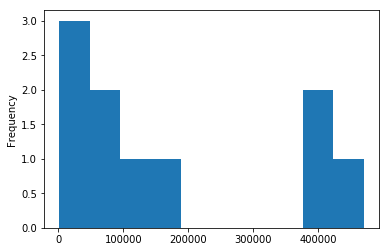

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_excel('data/case-status.xls',header=1)
df.Approved.plot('hist')
plt.show()

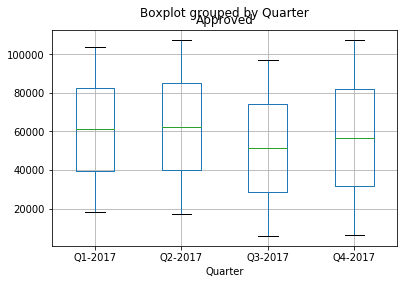

In [11]:
import pandas as pd
df = pd.read_excel('data/2017-status.xls',header=1)
df.boxplot(column='Approved',by='Quarter')
plt.show()

### PIVOT: UN-MELTING DATA
The raw data provided by the USCIS website was not normalized. So, I had to normalize the data while converting it into excel. This was done prior to importing the dataset in python. But I had to pivot the data to group by year to convert the data from Analysis friendly shape to reporting friendly shape.

In [12]:
import pandas as pd
df = pd.read_excel('data/2017-status.xls',header=1)
daca_tidy= df.pivot(index='Quarter',columns ='Type',values='Approved')
print(daca_tidy)

Type     Initial   Renewal
Quarter                   
Q1-2017     18239   103680
Q2-2017     17220   107480
Q3-2017      5827    96682
Q4-2017      6159   107426


### PIVOT Table Method
This method was not needed as there were no duplicates in any of the datasets.

### 2.  DACA STORY
------------------------------
DACA was an executive action taken by President Barack Obama that allowed undocumented immigrants who came to the US under the age of 16 to apply for protection from deportation. After a background check, those individuals were able to get renewable two-year permits to work and study in the US, as well.

Since it went into effect in 2012, roughly 800,000 people were protected by the program, and roughly 700,000 had active DACA protections in September when the Trump administration announced its end.

#### Interesting Fact
Since its inception in 2012, the renewal cases has exceeded the initial application cases from the year 2015 which means more renewal are happening than fresh application for a two year permit 

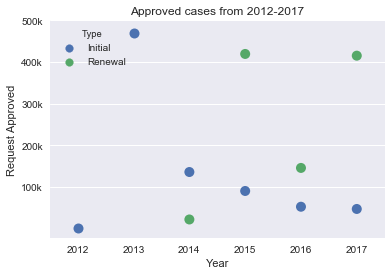

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
df = pd.read_excel('data/case-status.xls',header=1)

# Plot a swarmplot for request approved from 2012-2017
sns.swarmplot(x='Year', y='Approved', data=df,hue='Type',size=10)
plt.ylabel('Request Approved')
plt.title("Approved cases from 2012-2017")
tick_val = [100000,200000,300000,400000,500000]
tick_lab = ['100k','200k','300k','400k','500k']
plt.yticks(tick_val,tick_lab)
# Display the plot
plt.show()



#### Trends in Rejection
Since its inception, the trend in rejection for initial application has gone down as shown in red. Contrary to that, the rejection of renewal application has gone up as shown in blue. In 2017 alone 43,387 renewal applications were rejected marking it as the highest of all time. Note that this is rejection of application where the case was not even accepted. 

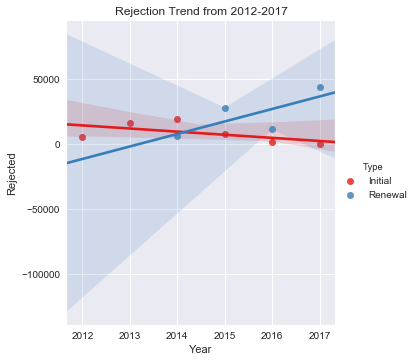

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set
df = pd.read_excel('data/case-status.xls',header=1)
# Plot a linear regression between 'weight' and 'hp', with a hue of 'origin' and palette of 'Set1'
sns.lmplot(x='Year', y='Rejected', data=df, hue='Type', palette='Set1')
# Display the plot
plt.title('Rejection Trend from 2012-2017')
plt.show()

#### APPROVAL/DENIAL USING BAR PLOT
If you notice the trend in the number of the petition being approved there is a drop every alternate year like 2014 and 2016. For Denials even though the trend is going down, it's not the real picture as the applications are getting rejected during acceptance phase

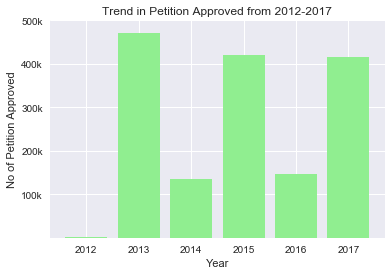

In [15]:
sns.set
df = pd.read_excel('data/case-status.xls',header=1)
plt.bar(df['Year'],df['Approved'],color='lightgreen')
plt.xlabel('Year')
plt.ylabel('No of Petition Approved')
plt.title('Trend in Petition Approved from 2012-2017')
tick_val = [100000,200000,300000,400000,500000]
tick_lab = ['100k','200k','300k','400k','500k']
plt.yticks(tick_val,tick_lab)
plt.show()

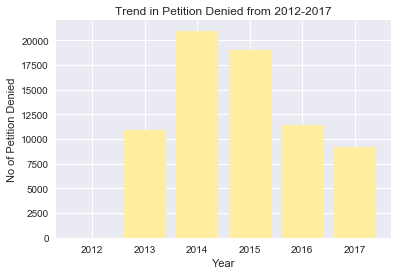

In [16]:
df = pd.read_excel('data/case-status.xls',header=1)
plt.bar(df['Year'],df['Denied'],color='#ffeda0')
plt.xlabel('Year')
plt.ylabel('No of Petition Denied')
plt.title('Trend in Petition Denied from 2012-2017')
plt.show()

#### COMPARING LAST 3 YEARS TREND
The first graph indicates applications have been accepted and rejected in the initial phase.

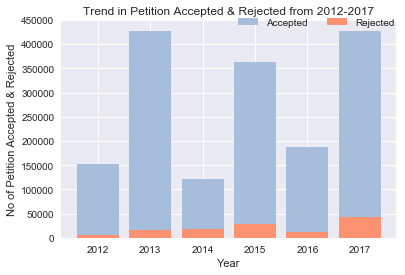

In [17]:
df = pd.read_excel('data/case-status.xls',header=1)
plt.bar(df['Year'],df['Accepted'],color='#a6bddb',label='Accepted')
plt.bar(df['Year'],df['Rejected'],color='#fc9272',label='Rejected')
plt.xlabel('Year')
plt.ylabel('No of Petition Accepted & Rejected')
plt.title('Trend in Petition Accepted & Rejected from 2012-2017')
plt.legend(loc='upper left', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
plt.show()

Below graph indicates the trend in approval and denial over the years. 

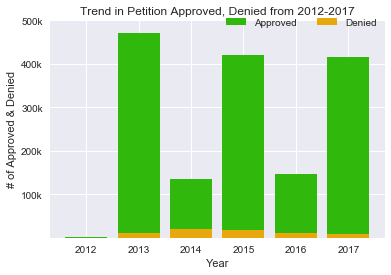

In [18]:
df = pd.read_excel('data/case-status.xls',header=1)
plt.bar(df['Year'],df['Approved'],color='#31B80D',label='Approved')
plt.bar(df['Year'],df['Denied'],color='#E8A70C',label='Denied')
plt.xlabel('Year')
plt.ylabel('# of Approved & Denied')
plt.title('Trend in Petition Approved, Denied from 2012-2017')
tick_val = [100000,200000,300000,400000,500000]
tick_lab = ['100k','200k','300k','400k','500k']
plt.legend(loc='upper left', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
plt.yticks(tick_val,tick_lab)
plt.show()

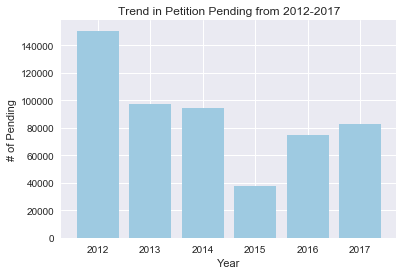

In [19]:
plt.bar(df['Year'],df['Pending'],color='#9ecae1')
plt.xlabel('Year')
plt.ylabel('# of Pending')
plt.title('Trend in Petition Pending from 2012-2017')
plt.show()

#### Exploring further
We calculated the percentage of approval, denial and pending for each year as per the type and we plotted couple of graphs for Initial and Renewal applications.


In [20]:
for lab, row in df.iterrows() :
    df['Total_Processed']  = df['Approved'] + df['Denied'] + df ['Pending']
    df["Approved_Percentage"] = round(df["Approved"]/df['Total_Processed'] * 100,1)
    df["Denied_Percentage"] = round(df["Rejected"]/df['Total_Processed']  * 100,1)
    df["Pending_Percentage"] = round(df["Pending"]/df['Total_Processed']  * 100,1)
df
df_subset = df1 = df[['Year','Type','Accepted','Approved','Denied','Pending','Total_Processed','Approved_Percentage','Denied_Percentage','Pending_Percentage']]
print(df_subset)

   Year     Type  Accepted  Approved  Denied  Pending  Total_Processed  \
0  2012  Initial    152431      1680       0   150751           152431   
1  2013  Initial    427616    470352   10975    97040           578367   
2  2014  Initial    122424    136101   20989    62374           219464   
3  2014  Renewal    116476     22235       0    94238           116473   
4  2015  Initial     85303     90613   19070    37994           147677   
5  2015  Renewal    363553    419394    2285    36112           457791   
6  2016  Initial     73362     52789   11398    47169           111356   
7  2016  Renewal    187339    145913    3029    74509           223451   
8  2017  Initial     45557     47445    9248    36033            92726   
9  2017  Renewal    427316    415268    3945    82612           501825   

   Approved_Percentage  Denied_Percentage  Pending_Percentage  
0                  1.1                3.5                98.9  
1                 81.3                2.8                

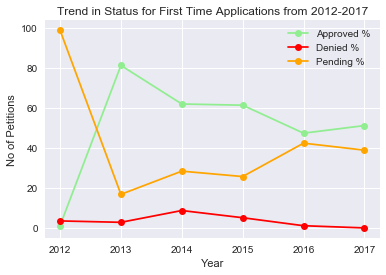

In [21]:
df_initial  = df_subset.loc[df_subset['Type'] == 'Initial']
plt.plot(df_initial['Year'],df_initial['Approved_Percentage'],color='lightgreen',label='Approved %',marker='o')
plt.plot(df_initial['Year'],df_initial['Denied_Percentage'],color='red',label='Denied %',marker='o')
plt.plot(df_initial['Year'],df_initial['Pending_Percentage'],color='orange',label='Pending %',marker='o')
plt.title('Trend in Status for First Time Applications from 2012-2017')
plt.xlabel('Year')
plt.ylabel('No of Petitions')
plt.legend(loc='upper right')
plt.show()

The trend for approved applications has gone down over the years but combined with renewal application it is consistent over the years. The number of denials has stayed flat through out apart from a little spike in 2014. 

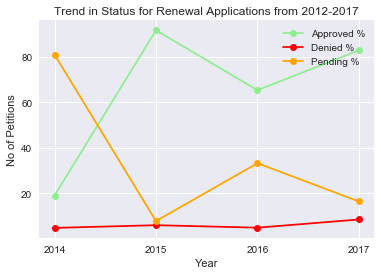

In [22]:
sns.set_style("darkgrid")
df_renewal  = df_subset.loc[df_subset['Type'] == 'Renewal']
plt.plot(df_renewal['Year'],df_renewal['Approved_Percentage'],color='lightgreen',label='Approved %',marker='o')
plt.plot(df_renewal['Year'],df_renewal['Denied_Percentage'],color='red',label='Denied %',marker='o')
plt.plot(df_renewal['Year'],df_renewal['Pending_Percentage'],color='orange',label='Pending %',marker='o')
plt.title('Trend in Status for Renewal Applications from 2012-2017')
plt.xlabel('Year')
plt.ylabel('No of Petitions')
plt.legend(loc='upper right')
tick_val = [2014,2015,2016,2017]
tick_lab = ['2014','2015','2016','2017']
plt.xticks(tick_val,tick_lab)
plt.show()

So when a application gets approved, the recipient gets an extension for 2 years. So it is obvious to see a spike in the approval rate in 2015 because of the number of renewal applications received in 2014. There is a small spike in denials in year 2017 but it's only 8.5%

#### TOP 5 COUNTRY & US STATE
Below graph shows the top 5 countries benefited by DACA act and the top 5 US state where the applications were approved. 

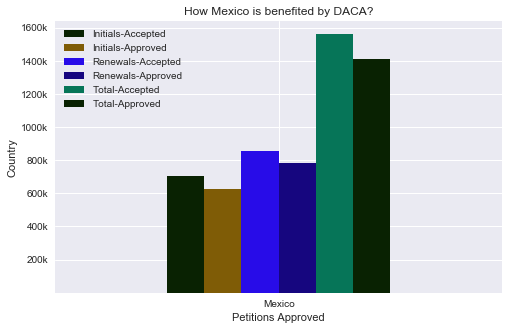

In [23]:
df = pd.read_excel('data/country-status.xls',header=1)
df.sort_values(by='Total-Approved')[-1:].plot(x='Country',kind='bar',figsize=(8,5),color=['#092202','#7F5C06','#280CE8','#16067F','#067558'])
plt.xlabel('Petitions Approved')
plt.ylabel('Country')
tick_val = [200000,400000,600000,800000,1000000,1200000,1400000,1600000]
tick_lab = ['200k','400k','600k','800k','1000k','1200k','1400k','1600k']
plt.yticks(tick_val,tick_lab)
plt.title('How Mexico is benefited by DACA?')
plt.xticks(rotation=0)
plt.show()

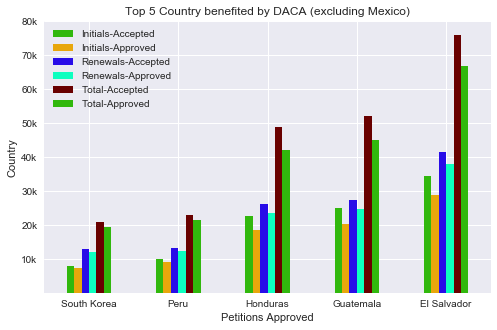

In [24]:
df.sort_values(by='Total-Approved')[-6:-1].plot(x='Country',kind='bar',figsize=(8,5),color=['#31B80D','#E8A70C','#280CE8','#0DFFBF','#690000'])
plt.xlabel('Petitions Approved')
plt.ylabel('Country')
tick_val = [10000,20000,30000,40000,50000,60000,70000,80000]
tick_lab = ['10k','20k','30k','40k','50k','60k','70k','80k']
plt.yticks(tick_val,tick_lab)
plt.title('Top 5 Country benefited by DACA (excluding Mexico)')
plt.xticks(rotation=0)
plt.show()

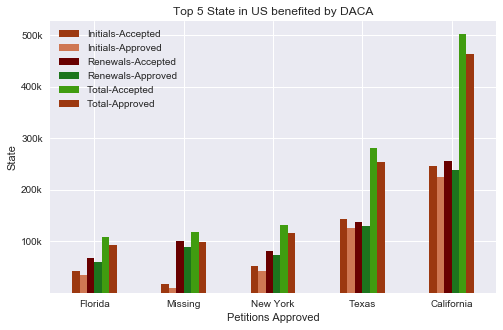

In [25]:
df = pd.read_excel('data/us-states-summary.xls',index=False,header=1)
top = (df.head(5))
df.sort_values(by='Total-Approved')[-5:].plot(x='State',kind='bar',figsize=(8,5),color=['#9C3810','#CF7753','#690000','#1D751D','#409C10'])
plt.xlabel('Petitions Approved')
plt.ylabel('State')
plt.title('Top 5 State in US benefited by DACA')
tick_val = [100000,200000,300000,400000,500000]
tick_lab = ['100k','200k','300k','400k','500k']
plt.yticks(tick_val,tick_lab)
plt.xticks(rotation=0)
plt.show()


#### AVERAGE APPLICATIONS PER DAY
In 2012 on an average around 3500 applications were accepted in a day. This has dropped in subsequent years. However, renewal applications have risen from the year 2014 and when both combined, USCIS has accepted around 2000 applications per day.

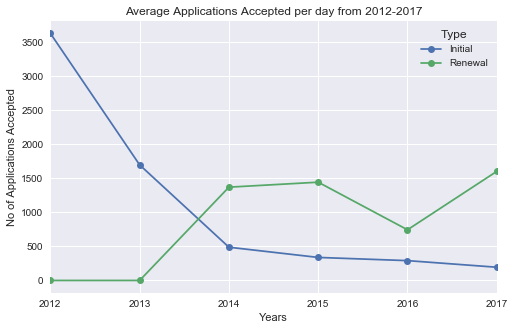

In [26]:
df = pd.read_excel('data/case-status.xls',header=1)
df_pivot = pd.pivot_table(df,values='Average',index='Year',columns='Type',fill_value=0,)
df_pivot.plot(kind='line',marker='o',figsize=(8,5))
plt.xlabel('Years')
plt.ylabel('No of Applications Accepted')
plt.title('Average Applications Accepted per day from 2012-2017')
plt.show()

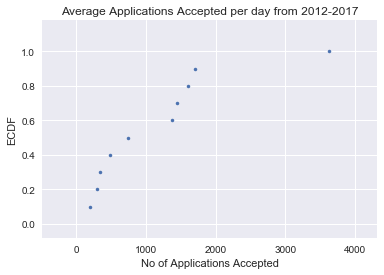

In [27]:
import numpy as np
df = pd.read_excel('data/case-status.xls',header=1)
x = np.sort(df['Average'])
y = np.arange(1,len(x)+1)/len(x)
_ = plt.plot(x,y,marker='.',linestyle='none')
plt.ylabel('ECDF')
plt.xlabel('No of Applications Accepted')
plt.title('Average Applications Accepted per day from 2012-2017')
plt.margins(0.2)
plt.show()

#### Calculate the percentile for the Average application

In [28]:
np.percentile(df['Average'],[25,50,75])

array([  375.5 ,  1057.  ,  1562.25])

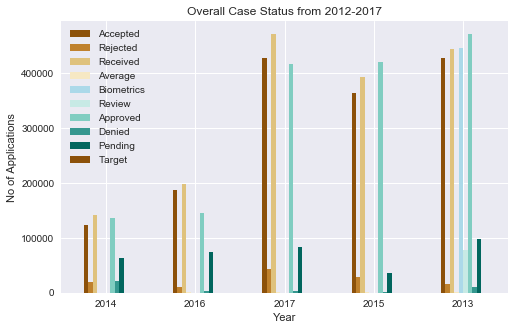

In [29]:
df.groupby('Year', as_index=False).agg({"Accepted": "sum"})
df.sort_values(by='Approved')[-5:].plot(x='Year',kind='bar',figsize=(8,5),color=['#8c510a','#bf812d','#dfc27d','#f6e8c3','#abd9e9','#c7eae5','#80cdc1','#35978f','#01665e'])
plt.xticks(rotation=0)
plt.ylabel('No of Applications')
plt.title('Overall Case Status from 2012-2017')
plt.show()

### 3 Applying Inferential Statistics in DACA Data
Now that we've learned the basics of inferential statistics and hypothesis testing, let's apply that to the Capstone Project

In [30]:
import scipy.stats as stats
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [31]:
df_case_status = pd.read_excel('data/case-status.xls',header=1)
print(df_case_status.head())

   Year     Type  Accepted  Rejected  Received  Average  Biometrics   Review  \
0  2012  Initial    152431      5395    157826     3629    124055.0  38024.0   
1  2013  Initial    427616     16351    443967     1697    445013.0  77747.0   
2  2014  Initial    122424     19127    141551      488         NaN      NaN   
3  2014  Renewal    116476      5760    122236     1370         NaN      NaN   
4  2015  Initial     85303      7477     92780      338         NaN      NaN   

   Approved  Denied  Pending  Target  
0      1680       0   150751       1  
1    470352   10975    97040       0  
2    136101   20989    62374       1  
3     22235       0    94238       0  
4     90613   19070    37994       1  


#### Let's add couple of calculated columns like Accepted & Rejected Percentage

In [32]:
for lab, row in df_case_status.iterrows() :
    df_case_status["Accepted_Percentage"] = round(df_case_status["Accepted"]/df_case_status['Received']  * 100,1)
    df_case_status["Rejection_Percentage"] = round(df_case_status["Rejected"]/df_case_status['Received']  * 100,1)
print(df_case_status)

   Year     Type  Accepted  Rejected  Received  Average  Biometrics   Review  \
0  2012  Initial    152431      5395    157826     3629    124055.0  38024.0   
1  2013  Initial    427616     16351    443967     1697    445013.0  77747.0   
2  2014  Initial    122424     19127    141551      488         NaN      NaN   
3  2014  Renewal    116476      5760    122236     1370         NaN      NaN   
4  2015  Initial     85303      7477     92780      338         NaN      NaN   
5  2015  Renewal    363553     27997    391550     1443         NaN      NaN   
6  2016  Initial     73362      1204     74566      291         NaN      NaN   
7  2016  Renewal    187339     11113    198452      744         NaN      NaN   
8  2017  Initial     45557        42     45599      194         NaN      NaN   
9  2017  Renewal    427316     43387    470703     1602         NaN      NaN   

   Approved  Denied  Pending  Target  Accepted_Percentage  \
0      1680       0   150751       1                 96.6 

#### Accepted Percentage Trend from 2012 to 2017
After Trump became the president of United States, there was no signigicant change in the trend on how the application was accepted.

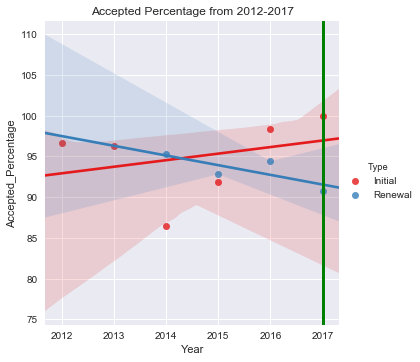

In [33]:
sns.lmplot(x='Year', y='Accepted_Percentage', data=df_case_status, hue='Type', palette='Set1')
# Display the plot
plt.title('Accepted Percentage from 2012-2017')
plt.axvline(x=2017, linewidth=3, color='green')
plt.show()

#### Examine the Mean, Std, min, max and percentile for case status from 2012-2017


In [34]:
print(round(df_case_status.describe(),2))

          Year   Accepted  Rejected   Received  Average  Biometrics    Review  \
count    10.00      10.00     10.00      10.00    10.00        2.00      2.00   
mean   2014.90  200137.70  13785.30  213923.00  1179.60   284534.00  57885.50   
std       1.66  148583.55  13508.25  159814.81  1037.55   226951.58  28088.40   
min    2012.00   45557.00     42.00   45599.00   194.00   124055.00  38024.00   
25%    2014.00   93096.25   5486.25  100144.00   375.50   204294.50  47954.75   
50%    2015.00  137427.50   9295.00  149688.50  1057.00   284534.00  57885.50   
75%    2016.00  319499.50  18433.00  343275.50  1562.25   364773.50  67816.25   
max    2017.00  427616.00  43387.00  470703.00  3629.00   445013.00  77747.00   

        Approved    Denied    Pending  Target  Accepted_Percentage  \
count      10.00     10.00      10.00   10.00                10.00   
mean   180179.00   8093.90   71883.20    0.50                94.29   
std    182112.56   7564.10   36345.94    0.53               

#### Let's explore some of the datasets we have not yet explored.
1. DACA Recipients by Country
2. DACA Recipients by US State
3. DACA Recipients by Status
4. DACA Recipients by Age
5. DACA Recipients by Sex

#### Top 4 DACA Recipients Countries (excluding Mexico) as of 2017

In [35]:
df_rec_country = pd.read_excel('data/daca_recipients_country.xls',header=1)
for lab, row in df_rec_country.iterrows() :
    df_rec_country["Country_Share"] = round(df_rec_country["Recipients"]/df_rec_country['Recipients'].sum()  * 100,1)
print(df_rec_country.head(10))

        Country  Recipients  Yrows  Xcols  Country_Share
0        Mexico      548000    1.0    1.0           79.4
1   El Salvador       25900    1.0    2.0            3.8
2     Guatemala       17700    1.0    3.0            2.6
3      Honduras       16100    1.0    4.0            2.3
4          Peru        7420    1.0    5.0            1.1
5  Korea, South        7310    2.0    1.0            1.1
6        Brazil        5780    2.0    2.0            0.8
7       Ecuador        5460    2.0    3.0            0.8
8      Colombia        5020    2.0    4.0            0.7
9     Argentina        3970    2.0    5.0            0.6


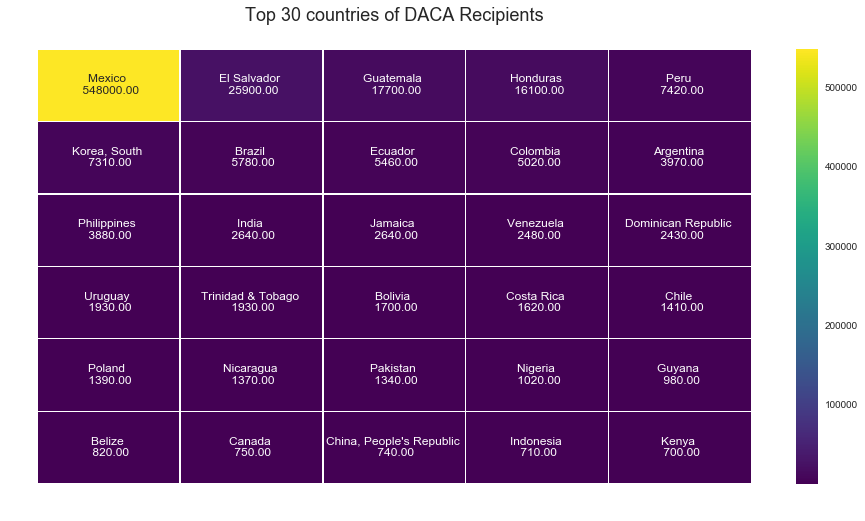

In [36]:
df_rec_country_top30 = df_rec_country.head(30)
country_name = ((np.asarray(df_rec_country_top30['Country'])).reshape(6,5))
count = ((np.asarray(df_rec_country_top30['Recipients'])).reshape(6,5))
result = df_rec_country_top30.pivot(index='Yrows',columns='Xcols',values='Recipients')
labels = (np.asarray(["{0} \n {1:.2f}".format(symb,value)
                      for symb,value in zip(country_name.flatten(),
                                            count.flatten())])
         ).reshape(6,5)
fig,ax = plt.subplots(figsize=(16,8))
title = 'Top 30 countries of DACA Recipients'
plt.title(title,fontsize = 18)
ttl= ax.title
ttl.set_position([0.5,1.05])
ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')
sns.heatmap(result,annot=labels,fmt="",cmap='viridis',linewidths=0.30,ax=ax)
plt.show()

#### Top 30 DACA Recipients US State as of 2017

In [37]:
df_rec_state = pd.read_excel('data/daca_recipients_state.xls',header=1)
for lab, row in df_rec_state.iterrows() :
    df_rec_state["State_Share"] = round(df_rec_state["Recipients"]/df_rec_state['Recipients'].sum()  * 100,1)
print(df_rec_state.head(10))

            State  Recipients  Yrows  Xcols  State_Share
0      California      197900    1.0    1.0         28.7
1           Texas      113000    1.0    2.0         16.4
2        Illinois       35600    1.0    3.0          5.2
3        New York       32900    1.0    4.0          4.8
4         Florida       27000    1.0    5.0          3.9
5         Arizona       25500    2.0    1.0          3.7
6  North Carolina       25100    2.0    2.0          3.6
7         Georgia       21600    2.0    3.0          3.1
8      New Jersey       17400    2.0    4.0          2.5
9      Washington       16300    2.0    5.0          2.4


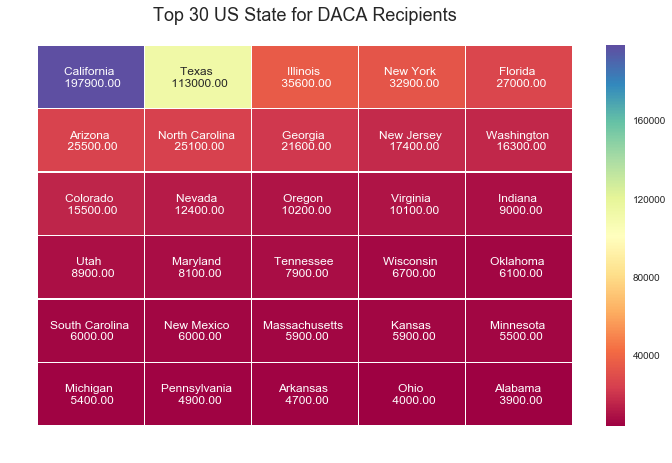

In [38]:
df_rec_state_top30 = df_rec_state.head(30)
symbol = ((np.asarray(df_rec_state_top30['State'])).reshape(6,5))
percentage = ((np.asarray(df_rec_state_top30['Recipients'])).reshape(6,5))
result = df_rec_state_top30.pivot(index='Yrows',columns='Xcols',values='Recipients')
labels = (np.asarray(["{0} \n {1:.2f}".format(symb,value)
                      for symb,value in zip(symbol.flatten(),
                                            percentage.flatten())])
         ).reshape(6,5)
fig,ax = plt.subplots(figsize=(12,7))
title = 'Top 30 US State for DACA Recipients'
plt.title(title,fontsize = 18)
ttl= ax.title
ttl.set_position([0.5,1.05])
ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')
sns.heatmap(result,annot=labels,fmt="",cmap='Spectral',linewidths=0.30,ax=ax)
plt.show()


#### Sex Ratio of DACA Recipients as of 2017

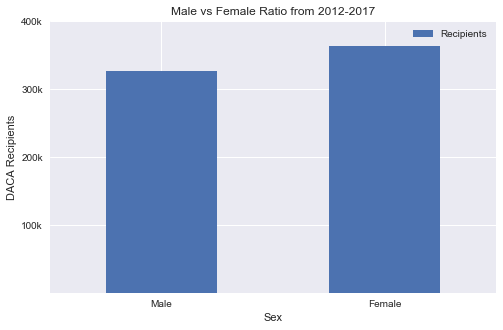

In [39]:
df_rec_sex = pd.read_excel('data/daca_sex_ratio.xls',header=1)
df_rec_sex_top5 = df_rec_sex.head(2)
sns.set()
df_rec_sex_top5.sort_values(by='Recipients')[-5:].plot(x='Sex',kind='bar',figsize=(8,5))
plt.xlabel('Sex')
plt.ylabel('DACA Recipients')
plt.title('Male vs Female Ratio from 2012-2017')
tick_val = [100000,200000,300000,400000]
tick_lab = ['100k','200k','300k','400k']
plt.yticks(tick_val,tick_lab)
plt.xticks(rotation=0)
plt.show()

#### Age range of DACA Recipients as of 2017


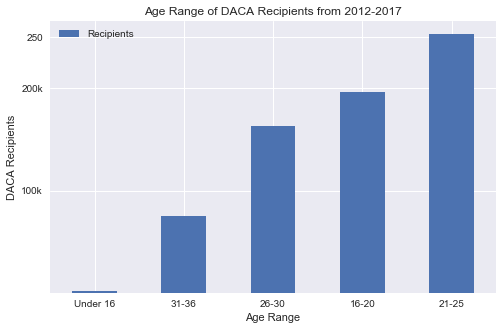

In [40]:
df_rec_age = pd.read_excel('data/daca_recipients_age.xls',header=1)
df_rec_age_top5 = df_rec_age.head(5)
sns.set()
df_rec_age_top5.sort_values(by='Recipients')[-5:].plot(x='Age',kind='bar',figsize=(8,5))
plt.xlabel('Age Range')
plt.ylabel('DACA Recipients')
plt.title('Age Range of DACA Recipients from 2012-2017')
tick_val = [100000,200000,250000]
tick_lab = ['100k','200k','250']
plt.yticks(tick_val,tick_lab)
plt.xticks(rotation=0)
plt.show()

#### Maritial Status of DACA Recipients as of 2017


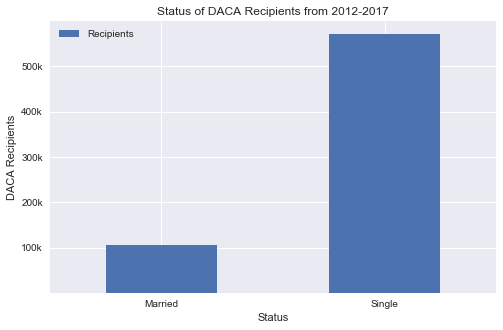

In [41]:
df_rec_status = pd.read_excel('data/daca_recipients_status.xls',header=1)
df_rec_status_top5 = df_rec_status.head(2)
sns.set()
df_rec_status_top5.sort_values(by='Recipients')[-5:].plot(x='Status',kind='bar',figsize=(8,5))
plt.xlabel('Status')
plt.ylabel('DACA Recipients')
plt.title('Status of DACA Recipients from 2012-2017')
tick_val = [100000,200000,300000,400000,500000]
tick_lab = ['100k','200k','300k','400k','500k']
plt.yticks(tick_val,tick_lab)
plt.xticks(rotation=0)
plt.show()

#### Calculate the number of countries benefited by DACA and their average mean

In [42]:
# Remove all null from DACA country recipients
df_rec_country_all = pd.read_excel('data/daca_recipients_country.xls',header=1)
clean_df_rec_country_all = df_rec_country_all[np.logical_not(df_rec_country_all['Recipients'].isnull())]
print('Number of countries: {}'.format(len(clean_df_rec_country_all)))
print('Mean excess DACA Recipient ratio: {:.4f}'.format(clean_df_rec_country_all['Recipients'].mean()))

Number of countries: 151
Mean excess DACA Recipient ratio: 4570.3974


#### Let's divide the countries benefitted by DACA into two groups and calculate their mean
1. Less than 1000 recipients
2. More than 1000 recipients

In [43]:

df_less_1000 = clean_df_rec_country_all[(clean_df_rec_country_all['Recipients'] < 1000) & (clean_df_rec_country_all['Recipients'] > 0)]
print('Number of countries with < 1000 DACA Recipients: {}'.format(len(df_less_1000)))
print('Mean excess Recipients rate: {:.3f}'.format(df_less_1000['Recipients'].mean()))


df_great_1000 = clean_df_rec_country_all[clean_df_rec_country_all['Recipients'] > 10000]
print('\nNumber of countries with > 1000 DACA Recipients: {}'.format(len(df_great_1000)))
print('Mean excess Recipients rate: {:.3f}'.format(df_great_1000['Recipients'].mean()))


Number of countries with < 1000 DACA Recipients: 126
Mean excess Recipients rate: 141.984

Number of countries with > 1000 DACA Recipients: 4
Mean excess Recipients rate: 151925.000


#### Compute and report the observed significance value (or p-value).

In [44]:
import statsmodels.stats.api as sms
from scipy import stats
import pandas.tseries
two_sample = stats.ttest_ind(df_less_1000['Recipients'], 
                          df_great_1000['Recipients'])
cm = sms.CompareMeans(sms.DescrStatsW(df_less_1000['Recipients']), 
                      sms.DescrStatsW(df_great_1000['Recipients']))

print('The 99% confidence interval about the mean difference is ({:.3f}, {:.3f}).'.format(cm.tconfint_diff(alpha = 0.01, usevar='unequal')[0],
                                                                                          cm.tconfint_diff(alpha = 0.01, usevar='unequal')[1]))
print('The t-statistic is %.3f and the p-value is %.8f.' % two_sample)

The 99% confidence interval about the mean difference is (-923030.943, 619464.912).
The t-statistic is -7.392 and the p-value is 0.00000000.


/Users/sunilayyappan/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


#### Plot a histogram for group less than 1000 recipients.


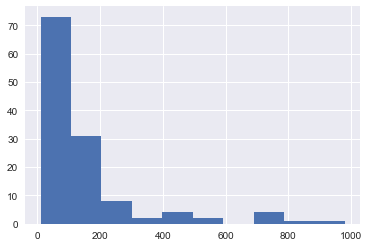

In [45]:
plt.hist(df_less_1000['Recipients'])
plt.show()

In the above figure, we clearly notice that the distribution is not a normal one.It is a left skewed plot.

In [46]:
df_sum = df_less_1000['Recipients'].sum()
for lab, row in df_less_1000.iterrows() :
    df_less_1000["Country_Share"] = round(df_less_1000["Recipients"]/df_sum  * 100,1)
print(df_less_1000.head(10))

/Users/sunilayyappan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


                     Country  Recipients  Yrows  Xcols  Country_Share
24                    Guyana         980    5.0    5.0            5.5
25                    Belize         820    6.0    1.0            4.6
26                    Canada         750    6.0    2.0            4.2
27  China, People's Republic         740    6.0    3.0            4.1
28                 Indonesia         710    6.0    4.0            4.0
29                     Kenya         700    6.0    5.0            3.9
30                  Portugal         520    7.0    1.0            2.9
31            United Kingdom         500    7.0    2.0            2.8
32                Bangladesh         490    7.0    3.0            2.7
33                     Ghana         490    7.0    4.0            2.7


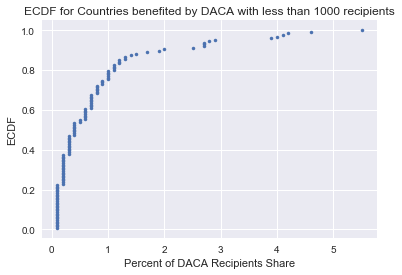

In [47]:
import numpy as np
x= np.sort(df_less_1000['Country_Share'])
y = np.arange(1,len(x) + 1)/len(x)
_ = plt.plot(x,y,marker='.',linestyle='none')
_ = plt.title('ECDF for Countries benefited by DACA with less than 1000 recipients')
_ = plt.xlabel('Percent of DACA Recipients Share')
_ = plt.ylabel('ECDF')
plt.margins(0.05)

#### Calculate the median for the two groups (Less than 1000 and greater than 1000)

In [48]:
df1 = df_less_1000.loc[:, 'Country':'Recipients']
print(df1.head(10))

                     Country  Recipients
24                    Guyana         980
25                    Belize         820
26                    Canada         750
27  China, People's Republic         740
28                 Indonesia         710
29                     Kenya         700
30                  Portugal         520
31            United Kingdom         500
32                Bangladesh         490
33                     Ghana         490


#### Calculate the percentile for both groups

In [49]:
print('The percentile for countries having less than 1000 DACA Recipients ',np.percentile(df_less_1000['Recipients'],[25,50,75]))
print('The percentile for countries having greater than 1000 DACA Recipients ',np.percentile(df_great_1000['Recipients'],[25,50,75]))

The percentile for countries having less than 1000 DACA Recipients  [  30.    75.   167.5]
The percentile for countries having greater than 1000 DACA Recipients  [  17300.   21800.  156425.]


#### Calculate the variance


In [50]:
print('The variance for countries less than 1000 DACA recipients',np.sqrt(np.var(df_less_1000)))
print('The variance for countries less than 1000 DACA recipients',np.sqrt(np.var(df_great_1000)))

The variance for countries less than 1000 DACA recipients Recipients       183.532445
Yrows              1.790250
Xcols              1.435393
Country_Share      1.024564
dtype: float64
The variance for countries less than 1000 DACA recipients Recipients    228704.223562
Yrows              0.000000
Xcols              1.118034
dtype: float64


#### Calculate the Logistic Regression for Overall Case Status

In [51]:
df_case_status = df = pd.read_excel('data/case-status.xls',header=1)
print(df_case_status.head())

   Year     Type  Accepted  Rejected  Received  Average  Biometrics   Review  \
0  2012  Initial    152431      5395    157826     3629    124055.0  38024.0   
1  2013  Initial    427616     16351    443967     1697    445013.0  77747.0   
2  2014  Initial    122424     19127    141551      488         NaN      NaN   
3  2014  Renewal    116476      5760    122236     1370         NaN      NaN   
4  2015  Initial     85303      7477     92780      338         NaN      NaN   

   Approved  Denied  Pending  Target  
0      1680       0   150751       1  
1    470352   10975    97040       0  
2    136101   20989    62374       1  
3     22235       0    94238       0  
4     90613   19070    37994       1  


In [52]:
from scipy.stats import spearmanr
import sklearn
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing

In [65]:
case_data = df_case_status.ix[:,(8,9)].values
case_data_name = ['Appr','Deny']
y = df_case_status.ix[:,11].values

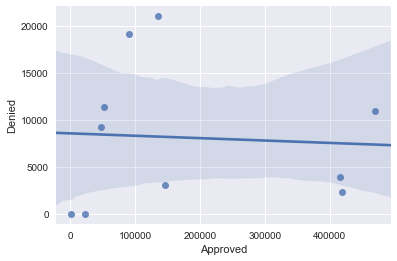

In [54]:
sns.regplot(x='Approved',y='Denied',data=df_case_status,scatter=True)

In [55]:
Appr = df_case_status['Approved']
Deny = df_case_status['Denied']
spearmanr_coefficient,p_value = spearmanr(Appr,Deny)
print('Spearmanr Rank Correlation Coefficient %0.3f' % spearmanr_coefficient )

Spearmanr Rank Correlation Coefficient 0.267


#### Check for missing values

In [56]:
print(df_case_status.isnull().sum())

Year          0
Type          0
Accepted      0
Rejected      0
Received      0
Average       0
Biometrics    8
Review        8
Approved      0
Denied        0
Pending       0
Target        0
dtype: int64


#### Check that your target variable is binary or cardinal

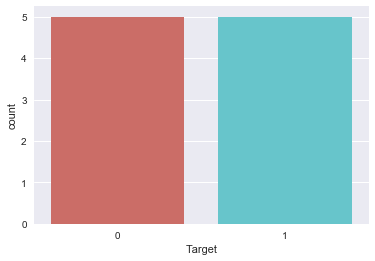

In [57]:
sns.countplot(x='Target',data =df_case_status,palette='hls' )

#### Checks the size of data is sufficient

In [58]:
print(df_case_status.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 12 columns):
Year          10 non-null int64
Type          10 non-null object
Accepted      10 non-null int64
Rejected      10 non-null int64
Received      10 non-null int64
Average       10 non-null int64
Biometrics    2 non-null float64
Review        2 non-null float64
Approved      10 non-null int64
Denied        10 non-null int64
Pending       10 non-null int64
Target        10 non-null int64
dtypes: float64(2), int64(9), object(1)
memory usage: 1.0+ KB
None


We need to have atleast 50 observations for each predictor. We are using 2 predictor so we should have atleast 100 observation. But as per the information above we only have 10 observation. For the purpose of this demonstration we will continue to work with the Logistic model.

#### Deploying and Evaluating the model

In [59]:
X = scale(case_data)

/Users/sunilayyappan/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [60]:
LogReg = LogisticRegression()
LogReg.fit(X,y)
print (LogReg.score(X,y))

1.0


In [61]:
y_pred = LogReg.predict(X)
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         5
          1       1.00      1.00      1.00         5

avg / total       1.00      1.00      1.00        10



### 4.Conclusion
We see that total precision is 1, recall is 1 which seems to be a perfect fit. Even though the datasets were not sufficient to explore the logistic model, We have walked through the complete logistic model. 